## ML project 2- Vehicle Price Prediction

#### our algorithm will take vehicle details like mileage, engine type, number of doors, length,width,height, engine capacity,etc..and our algorithm will predict PRICE of the vehicle.

## Step 1)- Load the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
auto_data = pd.read_csv('auto.txt')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## step 2 - clean data

In [3]:
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [6]:
auto_data['price'].describe() #if you see the data type of price is object type..
# object cant be summarized with numerical statistics.

count      201
unique     186
top       8921
freq         2
Name: price, dtype: object

In [7]:
# we have to convert this column to float type
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') #(errors=coerce) means forcefully convert them to numeric by ignoring error
auto_data['price'].describe() #now type is converted to float

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
# there are some columns which plays no role in predicting the prices..one such column nrmlzd ls..drop those columns
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [10]:
 # see if any other columns are objects..convert them to number types
auto_data['horsepower'].describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

In [11]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')#cnvrt to float
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [12]:
auto_data['bore'] = pd.to_numeric(auto_data['bore'], errors='coerce')#cnvrt to float
auto_data['bore'].describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [13]:
auto_data['num-of-cylinders'].describe() 

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [14]:
auto_data['stroke'] = pd.to_numeric(auto_data['stroke'], errors='coerce')#cnvrt to float
auto_data['stroke'].describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [15]:
auto_data['peak-rpm'] = pd.to_numeric(auto_data['peak-rpm'], errors='coerce')#cnvrt to float
auto_data['peak-rpm'].describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

In [16]:
cylinders_dict = {
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace = True)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [17]:
# auto_data = pd.get_dummies(df, columns=[
#     'make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
#     'engine-location','engine-type','fuel-system'
# ])
# auto_data.head()

In [18]:
auto_data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [19]:
a = {'1bbl':1, '2bbl':2, '4bbl':3, 'idi':4, 'mfi':5, 'mpfi':6,'spdi':7, 'spfi':8}
auto_data['fuel-system'].replace(a, inplace = True)

b = {'dohc':1, 'dohcv':2, 'l':3, 'ohc':4, 'ohcf':5, 'ohcv':6,'rotor':7}
auto_data['engine-type'].replace(b, inplace = True)

c = {'front':1, 'rear':2}
auto_data['engine-location'].replace(c, inplace = True)
d = {'4wd':1, 'fwd':2, 'rwd':3}
auto_data['drive-wheels'].replace(d, inplace = True)

e = {
    'alfa-romero' : 1,'audi' : 2,'bmw': 3,'chevrolet' :4,'dodge':5,
        'honda':6, 'isuzu':7,'jaguar':8, 'mazda':9, 'mercedes-benz':10, 
        'mercury':11,'mitsubishi':12, 'nissan':13, 'peugot':14, 
        'plymouth':15,'porsche':16, 'renault':17, 'saab':18, 'subaru':19,
       'toyota':20, 'volkswagen':21, 'volvo':22
}
auto_data['make'].replace(e, inplace = True)

f = {'convertible':1,'hardtop':2, 'hatchback':3, 'sedan':4, 'wagon':5}
auto_data['body-style'].replace(f, inplace = True)

g = {'four':4, 'two':2}
auto_data['num-of-doors'].replace(g, inplace = True)

h = {'std':0, 'turbo':1}
auto_data['aspiration'].replace(h, inplace = True)
i = {'gas':0, 'diesel':1}
auto_data['fuel-type'].replace(i, inplace = True)

auto_data.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,0,0,2.0,1,3,1,88.6,168.8,...,130,6,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,0,0,2.0,1,3,1,88.6,168.8,...,130,6,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,0,0,2.0,3,3,1,94.5,171.2,...,152,6,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,0,0,4.0,4,2,1,99.8,176.6,...,109,6,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,0,0,4.0,4,1,1,99.4,176.6,...,136,6,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,2,0,0,2.0,4,2,1,99.8,177.3,...,136,6,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,2,0,0,4.0,4,2,1,105.8,192.7,...,136,6,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,2,0,0,4.0,5,2,1,105.8,192.7,...,136,6,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,2,0,1,4.0,4,2,1,105.8,192.7,...,131,6,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,2,0,1,2.0,3,1,1,99.5,178.2,...,131,6,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [20]:
auto_data.isnull().any()

symboling            False
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [21]:
auto_data.isna().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [22]:
auto_data = auto_data.dropna()

In [23]:
del auto_data['horsepower']
del auto_data['peak-rpm']
del auto_data['curb-weight']

# STEP 3- train_test_split

In [24]:
from sklearn.model_selection import train_test_split
# lets feed our data to machine learning model
x = auto_data.drop('price', axis=1)

y = auto_data['price']

# split data into 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

# step 4 - train the algorithm

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [26]:
linear_model.score(x_train, y_train) #get the r-square which tells how good is the regression line
# how close the data points to the fitted linear regression line..96% is very high, very close.

0.9021414590998449

In [27]:
linear_model.coef_ #shows weights of all features in our data sets.#co-efficient tells which columns are important

array([-4.86746790e+02, -2.51145350e+02, -1.18300579e+04,  3.76363401e+03,
       -1.33829509e+02, -5.93590690e+02,  9.50764735e+02,  1.12591903e+04,
       -8.55774713e+01, -5.98166836e-01,  9.42665087e+02,  5.26545915e+02,
       -3.14571288e+02,  8.51328107e+02,  1.25761242e+02,  1.77595101e+02,
        7.58997007e+01, -3.81053489e+03,  8.33820504e+02, -2.81521484e+02,
        3.42215819e+02])

In [28]:
predictors = x_train.columns #see the weights associcated with perticular feature.
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef) 

fuel-type           -11830.057895
stroke               -3810.534890
body-style            -593.590690
symboling             -486.746790
engine-type           -314.571288
city-mpg              -281.521484
make                  -251.145350
num-of-doors          -133.829509
wheel-base             -85.577471
length                  -0.598167
bore                    75.899701
engine-size            125.761242
fuel-system            177.595101
highway-mpg            342.215819
height                 526.545915
compression-ratio      833.820504
num-of-cylinders       851.328107
width                  942.665087
drive-wheels           950.764735
aspiration            3763.634009
engine-location      11259.190334
dtype: float64


### STEP 5: test the algorithm

In [29]:
# let us predictusing liner regression model
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Gattu\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


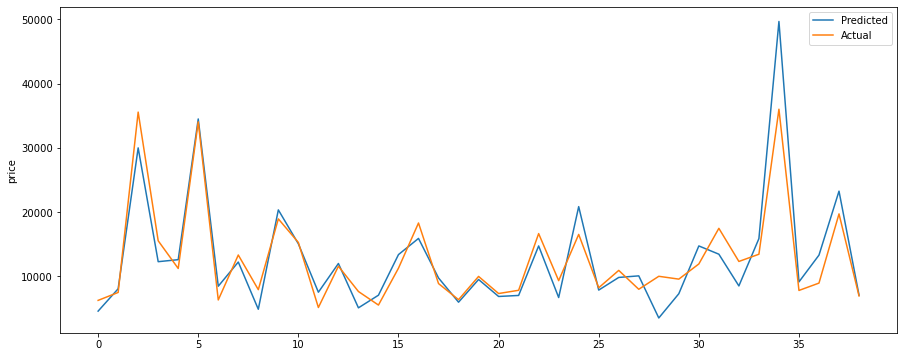

In [30]:
#lets plot the predection matplotlib
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values,label='Actual')

plt.ylabel('price')
plt.legend()
plt.show()

In [31]:
# how well our regression model works on our test data -->this is accuracy
score = linear_model.score(x_test,y_test)
score

0.804922257641284

### step 6:find the error (how much is the error in  the output)
#### MEAN SQUARED ERROR---this will tell us how each error is there in the given output 

In [32]:
from sklearn.metrics import mean_squared_error 

linear_model_mse = mean_squared_error(y_predict,y_test)#predict y actual value
linear_model_mse # its coming to be 26 millions

11227630.422660517

In [33]:
import math
math.sqrt(linear_model_mse)

3350.7656472305725

### conclusion for linear regression algorithm - accuracy is 80% and error is 3,350 dollars
## step 7: improvise,lets us test other algorithms

In [34]:
# implementing lasso and ridge regression models.
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5,normalize=True)# alpha is regularization parametter
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.5, normalize=True)

In [35]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

fuel-type            -7540.244006
stroke               -3747.995113
body-style            -592.473006
symboling             -419.456266
engine-type           -305.846638
make                  -242.266284
city-mpg              -224.414164
wheel-base             -78.055299
num-of-doors           -77.744371
length                   0.000000
bore                    43.232350
engine-size            120.598241
fuel-system            177.085916
highway-mpg            286.355867
height                 509.398128
compression-ratio      522.195962
num-of-cylinders       936.009073
width                  940.363248
drive-wheels          1029.845084
aspiration            3354.107572
engine-location      11615.329679
dtype: float64


In [36]:
y_predict = lasso_model.predict(x_test)
score = lasso_model.score(x_test,y_test)
print('accuracy of lasso model is...',score)
lasso_model_mse = mean_squared_error(y_predict,y_test)
print('error of lasso model is...',math.sqrt(lasso_model_mse))

accuracy of lasso model is... 0.8248595242727512
error of lasso model is... 3174.9248963660607


### conclusion for lasso- accuracy is 85% and error is 3174 dollars

In [37]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5,normalize = True)
ridge_model.fit(x_train,y_train)
y_predict = ridge_model.predict(x_test)
score = ridge_model.score(x_test,y_test)
print('accuracy of ridge model is...', score)
ridge_model_mse = mean_squared_error(y_predict,y_test)
print('error of ridge model is...',math.sqrt(ridge_model_mse))

accuracy of ridge model is... 0.8986315681370971
error of ridge model is... 2415.4138819620125


### conclusion for ridge algorithm - accuracy is 89% and error is 2415 dollars
### final conclusion - i am recomending ridge algorithm for vehicle price prediction project